<a href="https://colab.research.google.com/github/UmaMishra/Temperature-prediction/blob/main/Temperature_Prediction_Regression_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [47]:
data=pd.read_csv("/content/weatherHistory.csv")
data.head(5)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Doing basic check on the Dataframe

In [22]:
data.columns # given the name of the all columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [23]:
data.shape # print the shape of the data

(96453, 12)

In [56]:
data.describe()
data['Formatted Date'].dtypes

dtype('O')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [25]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

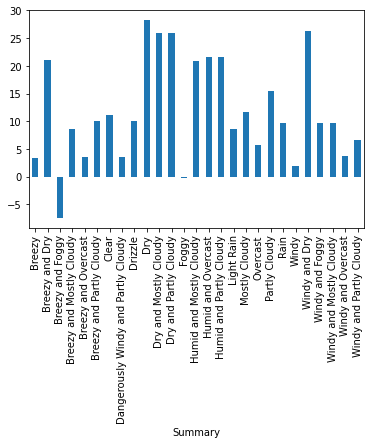

In [107]:
data.groupby('Summary').mean()["Apparent Temperature (C)"].plot(kind='bar')

# Now,we try to impute null with the maximum occured values

In [26]:
data['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [27]:
data.loc[data['Precip Type'].isnull(),'Precip Type']='rain'

In [28]:
data['Precip Type'].isnull().sum()

0

In [45]:
data.dtypes

Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
dtype: object

# Manage Categorical feature

In [29]:
# Imputing Binary values in type column
data.loc[data['Precip Type']=='rain','Precip Type']=1
data.loc[data['Precip Type']=='snow','Precip Type']=0

In [ ]:
Y=data['Temperature (C)']
X=data.drop(columns='Temperature (C)')

# Spliting the data into train and test datset

In [72]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [73]:
x_train.head(5)

,Formatted Date,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
70626,NaN,NaN,1,21.061111,0.31,12.5580,110.0,16.1000,0.0,1005.87,NaN
52457,NaN,NaN,1,25.016667,0.36,18.4989,352.0,10.3523,0.0,1025.36,NaN
90690,NaN,NaN,1,0.738889,0.89,17.1304,270.0,15.8263,0.0,1014.75,NaN
69528,NaN,NaN,1,13.772222,0.78,14.4900,300.0,15.8263,0.0,1014.56,NaN
92419,NaN,NaN,1,23.288889,0.82,6.3917,357.0,16.1000,0.0,1022.05,NaN


In [74]:
y_train.head(5)
y_test.head()

37443    -2.288889
86534     8.861111
2082      9.805556
53130    27.222222
45196    17.705556
Name: Temperature (C), dtype: float64

# Drop the formatted date,summary and Daily Summary 

In [83]:
x_train=x_train.drop(columns='Formatted Date',axis=1)
x_test=x_test.drop(columns='Formatted Date',axis=1)

x_train=x_train.drop(columns='Summary',axis=1)
x_test=x_test.drop(columns='Summary',axis=1)
x_train=x_train.drop(columns='Daily Summary',axis=1)

# Build The Model

In [84]:
x_train.head()

,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
70626,1,21.061111,0.31,12.5580,110.0,16.1000,0.0,1005.87
52457,1,25.016667,0.36,18.4989,352.0,10.3523,0.0,1025.36
90690,1,0.738889,0.89,17.1304,270.0,15.8263,0.0,1014.75
69528,1,13.772222,0.78,14.4900,300.0,15.8263,0.0,1014.56
92419,1,23.288889,0.82,6.3917,357.0,16.1000,0.0,1022.05


In [85]:
x_test.head()

,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
37443,0,-6.255556,0.92,10.8192,341.0,6.0697,0.0,1008.36
86534,1,8.861111,0.89,4.2987,262.0,9.9820,0.0,1017.62
2082,1,8.766667,0.83,8.1305,284.0,7.8729,0.0,1014.15
53130,1,26.344444,0.24,22.5400,160.0,9.9820,0.0,1016.70
45196,1,17.705556,0.82,3.3166,17.0,15.8263,0.0,1014.93


In [87]:
print(x_train.shape)
print(x_test.shape)

(77162, 8)
(19291, 8)


In [90]:
model=LinearRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)

In [91]:
# calculating the error
np.mean((prediction-y_test)**2) ## error is really high

0.9018876909318714

Text(0, 0.5, 'temperature')

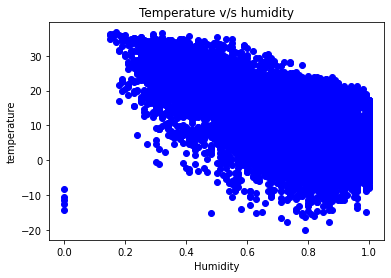

In [117]:
plt.scatter(x_test["Humidity"],prediction,color='blue')
plt.title("Temperature v/s humidity")
plt.xlabel("Humidity")
plt.ylabel("temperature")

# Polynomial Regression

In [94]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x_train)
poly.fit(x_poly,y_train)
lin2=LinearRegression()
lin2.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
prediction2=lin2.predict(poly.fit_transform(x_test))
## calculating the error
np.mean((prediction2-y_test)**2)

0.0992927254751186

# Cart (Decision Tree)

In [100]:
from sklearn.tree import DecisionTreeRegressor 


In [101]:
dec=DecisionTreeRegressor(random_state=0)
dec.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [103]:
prediction3=dec.predict(x_test)
np.mean((prediction3-y_test)**2)

0.008418241475107115

# Random Forest

In [104]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(max_depth=10,random_state=0,n_estimators=100)
reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [106]:
prediction4=reg.predict(x_test)
np.mean((prediction4-y_test)**2)

0.008142646878479324

Text(0, 0.5, 'temperature')

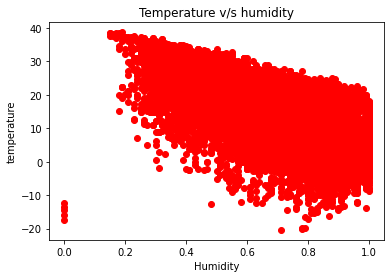

In [114]:
plt.scatter(x_test["Humidity"],prediction4,color='red')
plt.title("Temperature v/s humidity")
plt.xlabel("Humidity")
plt.ylabel("temperature")

In [118]:
test = pd.DataFrame(y_test)
test["y_predict"]= 0
test["y_predict"] = prediction4
test.head(20)

,Temperature (C),y_predict
37443,-2.288889,-2.482177
86534,8.861111,8.892260
2082,9.805556,9.847246
53130,27.222222,27.203396
45196,17.705556,17.713716
57822,3.888889,3.899663
26754,17.777778,17.777298
53177,28.977778,28.866500
7855,7.727778,7.745598
34256,9.950000,9.945057


In [119]:
data.iloc[3703]

Formatted Date               2006-12-07 07:00:00+02:00
Summary                                  Partly Cloudy
Precip Type                                       rain
Temperature (C)                                21.0222
Apparent Temperature (C)                       21.0222
Humidity                                           0.8
Wind Speed (km/h)                               3.1234
Wind Bearing (degrees)                             127
Visibility (km)                                 9.9015
Loud Cover                                           0
Pressure (millibars)                           1020.42
Daily Summary               Partly cloudy until night.
Name: 3703, dtype: object

In [121]:
from sklearn.metrics import explained_variance_score
variance = explained_variance_score(y_test,prediction, multioutput='uniform_average')
variance

0.9900838880601468